m: 26.9528 ± 0.0329 mT/A
b: 0.5532 ± 0.0671 mT


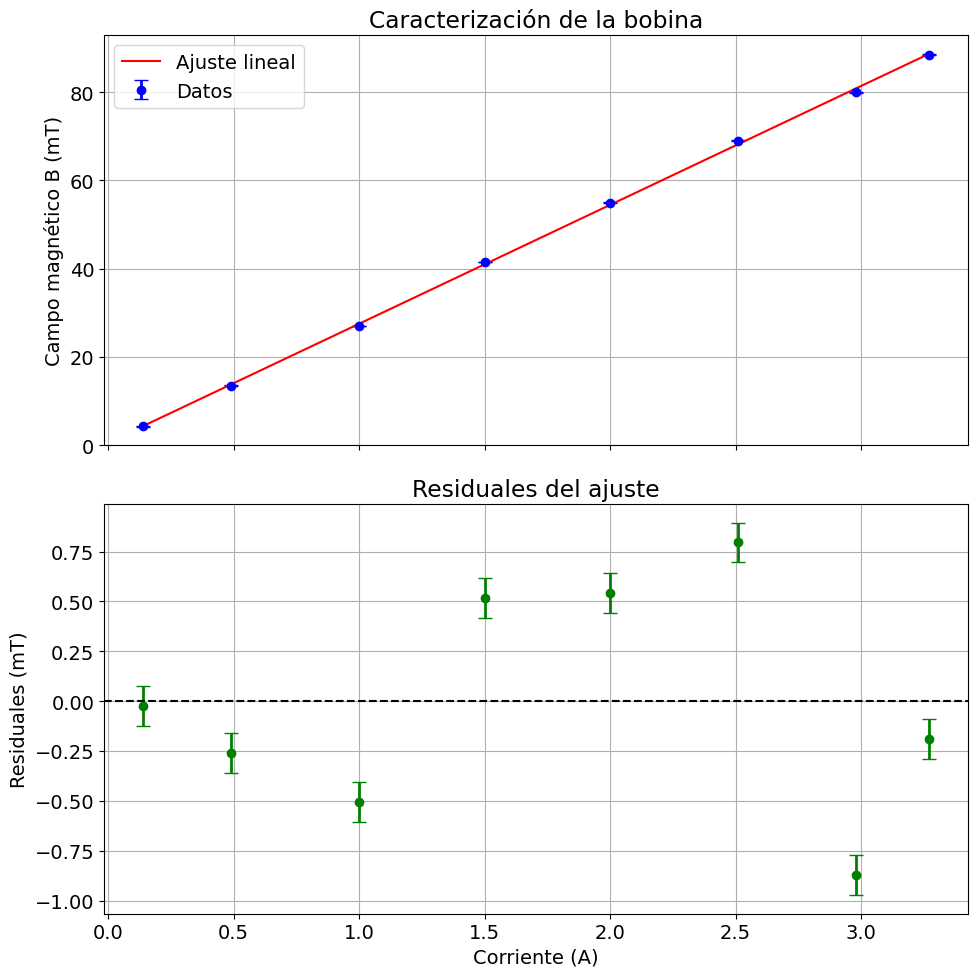

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


corriente = np.array([0.14, 0.49, 1.00, 1.50, 2.00, 2.51, 2.98, 3.27])
campo = np.array([4.3, 13.5, 27.0, 41.5, 55.0, 69.0, 80.0, 88.5])


sigma_B = np.full_like(campo, 0.1) 
sigma_I = np.full_like(corriente, 0.01)  


def modelo_lineal(I, m, b):
    return m * I + b


params, cov = curve_fit(modelo_lineal, corriente, campo, sigma=sigma_B, absolute_sigma=True)
m, b = params
dm, db = np.sqrt(np.diag(cov))


campo_ajustado = modelo_lineal(corriente, m, b)
residuales = campo - campo_ajustado


print(f"m: {m:.4f} ± {dm:.4f} mT/A")
print(f"b: {b:.4f} ± {db:.4f} mT")


plt.rcParams.update({'font.size': 14})
fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)


axs[0].errorbar(corriente, campo, yerr=sigma_B, fmt='o', color='blue',
                markersize=6, elinewidth=2, capsize=5, label='Datos')
axs[0].plot(corriente, campo_ajustado, 'r-', label='Ajuste lineal')
axs[0].set_ylabel("Campo magnético B (mT)")
axs[0].set_title("Caracterización de la bobina")
axs[0].legend()
axs[0].grid(True)


axs[1].errorbar(corriente, residuales, yerr=sigma_B, fmt='o', color='green',
                markersize=6, elinewidth=2, capsize=5)
axs[1].axhline(0, color='black', linestyle='--')
axs[1].set_xlabel("Corriente (A)")
axs[1].set_ylabel("Residuales (mT)")
axs[1].set_title("Residuales del ajuste")
axs[1].grid(True)

plt.tight_layout()
plt.show()

